In [1]:
!pip3 install networkx

In [1]:
# Import packages for data cleaning
import numpy as np
import pandas as pd
# Import packages for data visualization
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph = np.load('../data/obama/graphs_obama.npy', allow_pickle=True)

In [3]:
graph[0]['edges']

[['', '', '', ''],
 ['nsubj', '', '', ''],
 ['pobj', '', '', ''],
 ['pobj', '', '', '']]

In [4]:
graph[0]['nodes']

[{'type': 'A', 'dep': 'root', 'pos': 'VERB', 'word': 'speaks', 'index': [1]},
 {'type': 'A', 'dep': 'nsubj', 'pos': 'PROPN', 'word': 'Omaba', 'index': [0]},
 {'type': 'M',
  'dep': 'pobj',
  'pos': 'NOUN',
  'word': 'to the media',
  'index': [2, 3, 4]},
 {'type': 'M',
  'dep': 'pobj',
  'pos': 'PROPN',
  'word': 'in Illinois',
  'index': [5, 6]}]

In [5]:
twitter = nx.DiGraph()

In [6]:
# add nodes into networkx
'''
for node in graph[0]['nodes']:
    twitter.add_node(node['word'])
    nodes.append(node['word'])
'''
nodes = []
count = 0
column = 0
#add index 
for node in graph[0]['nodes']:
    twitter.add_node(node['word'],index=count)
    #twitter.add_node(node['word'])
    nodes.append(node['word'])
    count += 1
pos_0 = nx.multipartite_layout(twitter,subset_key='index',scale = 10)
pos_0

{'speaks': array([-10.,   0.]),
 'Omaba': array([-3.33333333,  0.        ]),
 'to the media': array([3.33333333, 0.        ]),
 'in Illinois': array([10.,  0.])}

In [8]:
# add edges into networkx
labels0 = {}
for i in range(len(graph[0]['edges'])):
    node1_index = i
    node1_edge = graph[0]['edges'][i]
    for j in range(len(node1_edge)):
        if node1_edge[j] != '':
            node2_index = j
            twitter.add_edge(graph[0]['nodes'][i]['word'], graph[0]['nodes'][j]['word'], color='b')
            labels0[(graph[0]['nodes'][i]['word'], graph[0]['nodes'][j]['word'])] = node1_edge[j]

In [10]:
for node in graph[1]['nodes']:
    twitter.add_node(node['word'])

labels1 = {}
for i in range(len(graph[1]['edges'])):
    node1_index = i
    node1_edge = graph[1]['edges'][i]
    for j in range(len(node1_edge)):
        if node1_edge[j] != '':
            node2_index = j
            twitter.add_edge(graph[1]['nodes'][i]['word'], graph[1]['nodes'][j]['word'], color='b')
            labels1[(graph[1]['nodes'][i]['word'], graph[1]['nodes'][j]['word'])] = node1_edge[j]

[{'type': 'A', 'dep': 'root', 'pos': 'VERB', 'word': 'Omaba was born', 'index': [0, 7, 8]}, {'type': 'A', 'dep': 'advcl', 'pos': 'VERB', 'word': 'working', 'index': [2]}, {'type': 'M', 'dep': 'pobj', 'pos': 'NOUN', 'word': 'for a press', 'index': [3, 4, 5]}, {'type': 'M', 'dep': 'pobj', 'pos': 'PROPN', 'word': 'in Chicago', 'index': [9, 10]}]


In [10]:
word2vec_embeddings = np.load('../data/obama/interim/word2vec_embeddings_obama.npy', allow_pickle=True)
bert_embeddings = np.load('../data/obama/interim/bert_embeddings_obama.npy', allow_pickle=True)

In [11]:
# link nearest node in two graphs

def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot/(norm1*norm2)

def get_node_embeddings(graph, embeddings):
    node_features = []
    for node in graph['nodes']:
        node_features.append(embeddings[[node['index']]].mean(axis=0))            
    return np.array(node_features)
    


# embedding0 = get_node_embeddings(graph[0], word2vec_embeddings[0])
# embedding1 = get_node_embeddings(graph[1], word2vec_embeddings[1])

embedding0 = get_node_embeddings(graph[0], bert_embeddings[0])
embedding1 = get_node_embeddings(graph[1], bert_embeddings[1])
    
w_match = 1
w_nonmatch = 0.5
    

node_match = []
word_match = []
for i1, e1 in enumerate(embedding1):
    node_sim = []
    for e0 in embedding0:
        if (np.all(e0==0))|(np.all(e1==0)):
            node_sim.append(0)
        else:
            node_sim.append(cosine_similarity(e0, e1))
    max_sim_node = np.argmax(node_sim)
    node_match.append((max_sim_node, i1))
    # word_match.append((graph[0][max_sim_node]['word'], graph[1][i1]['word']))

for (i, j) in node_match:
    twitter.add_edge(graph[0]['nodes'][i]['word'], graph[1]['nodes'][j]['word'], color='r')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':


In [12]:
# pos_ = nx.spring_layout(twitter)
pos_ = nx.circular_layout(twitter)
# pos_ = nx.bipartite_layout(twitter, nodes=nodes)
pos_

{'speaks': array([1.00000000e+00, 1.83784272e-08]),
 'Omaba': array([0.70710678, 0.70710677]),
 'to the media': array([-1.73863326e-08,  9.99999992e-01]),
 'in Illinois': array([-0.70710672,  0.70710677]),
 'Omaba was born': array([-9.99999947e-01, -6.90443471e-08]),
 'working': array([-0.70710678, -0.70710667]),
 'for a press': array([ 3.82499349e-08, -9.99999955e-01]),
 'in Chicago': array([ 0.70710666, -0.70710685])}

In [13]:
twitter.edges()

OutEdgeView([('Omaba', 'speaks'), ('Omaba', 'Omaba was born'), ('to the media', 'speaks'), ('to the media', 'working'), ('to the media', 'for a press'), ('in Illinois', 'speaks'), ('in Illinois', 'in Chicago'), ('working', 'Omaba was born'), ('for a press', 'working'), ('in Chicago', 'Omaba was born')])

{('working',
  'Omaba was born'): Text(-0.8535533655498928, -0.3535533707657914, 'advcl'),
 ('for a press',
  'working'): Text(-0.35355337274997994, -0.8535533138918769, 'pobj'),
 ('in Chicago',
  'Omaba was born'): Text(-0.14644664488190828, -0.35355346017275624, 'pobj')}

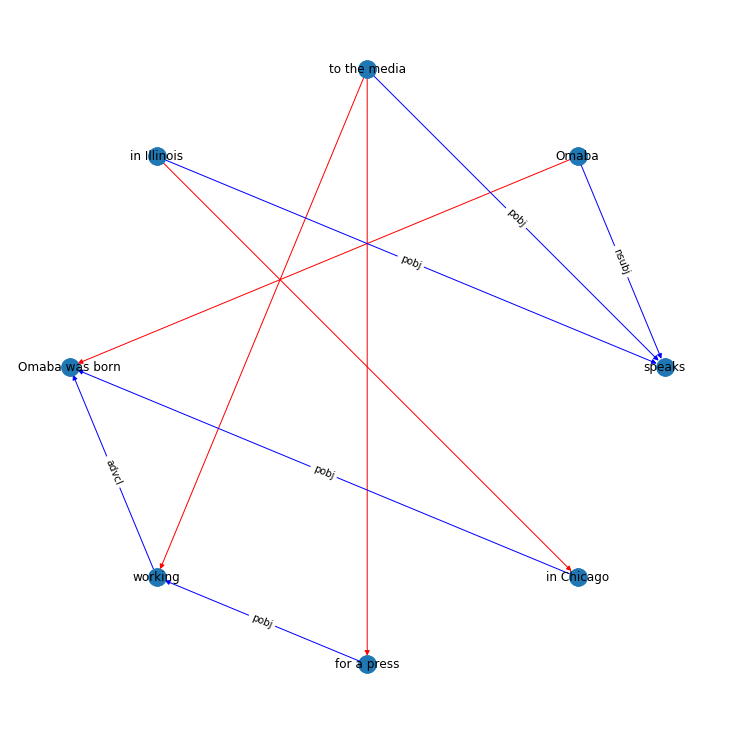

In [14]:
plt.figure(figsize=(10,10))
edges = twitter.edges()
colors = [twitter[u][v]['color'] for u,v in edges]

nx.draw(twitter, pos_, edge_color=colors)
nx.draw_networkx_nodes(twitter, pos_)
nx.draw_networkx_labels(twitter, pos_)
#nx.draw_networkx_edges(twitter,pos_,connectionstyle='arc3,rad=0.5',edge_color=colors)
#
#,connectionstyle='arc3,rad=0.2'
nx.draw_networkx_edge_labels(twitter, pos_,edge_labels=labels0)
nx.draw_networkx_edge_labels(twitter, pos_,edge_labels=labels1)


{'speaks': array([-10.,   0.]), 'Omaba': array([-7.14285714,  0.        ]), 'to the media': array([-4.28571429,  0.        ]), 'in Illinois': array([-1.42857143,  0.        ]), 'greets': array([1.42857143, 0.        ]), 'The president': array([4.28571429, 0.        ]), 'the press': array([7.14285714, 0.        ]), 'in Chicago': array([10.,  0.])}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


{'speaks': Text(-10.0, 0.0, 'speaks'),
 'Omaba': Text(-7.142857142857143, 0.0, 'Omaba'),
 'to the media': Text(-4.285714285714286, 0.0, 'to the media'),
 'in Illinois': Text(-1.4285714285714286, 0.0, 'in Illinois'),
 'greets': Text(1.4285714285714286, 0.0, 'greets'),
 'The president': Text(4.285714285714286, 0.0, 'The president'),
 'the press': Text(7.142857142857143, 0.0, 'the press'),
 'in Chicago': Text(10.0, 0.0, 'in Chicago')}

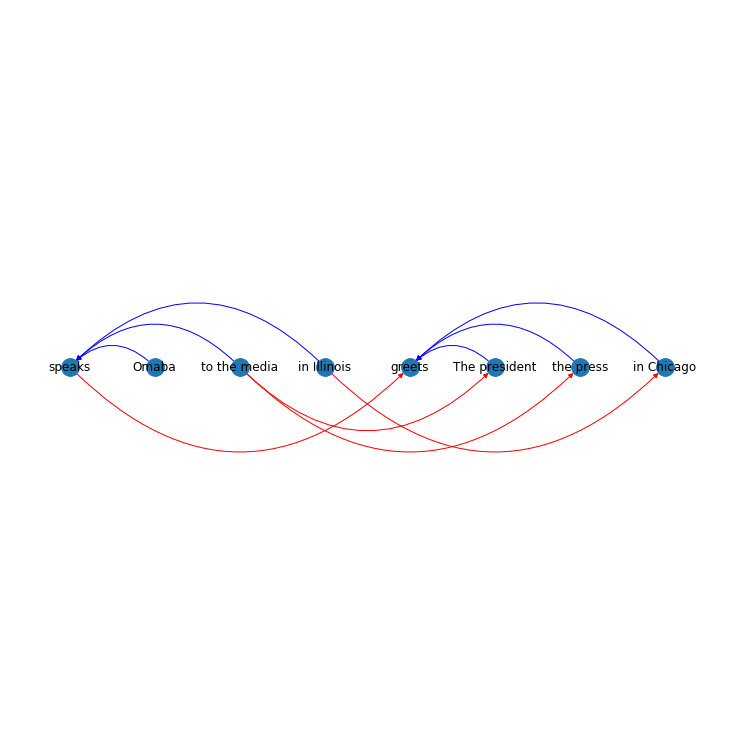

In [18]:
twitter = nx.DiGraph()
nodes = []
count = 0
#add index 
for node in graph[0]['nodes']:
    twitter.add_node(node['word'],index=count)
    #twitter.add_node(node['word'])
    nodes.append(node['word'])
    count += 1
labels0 = {}
for i in range(len(graph[0]['edges'])):
    node1_index = i
    node1_edge = graph[0]['edges'][i]
    for j in range(len(node1_edge)):
        if node1_edge[j] != '':
            node2_index = j
            twitter.add_edge(graph[0]['nodes'][i]['word'], graph[0]['nodes'][j]['word'], color='b')
            labels0[(graph[0]['nodes'][i]['word'], graph[0]['nodes'][j]['word'])] = node1_edge[j]

for node in graph[2]['nodes']:
    twitter.add_node(node['word'],index=count)
    count += 1
labels1 = {}
for i in range(len(graph[2]['edges'])):
    node1_index = i
    node1_edge = graph[2]['edges'][i]
    for j in range(len(node1_edge)):
        if node1_edge[j] != '':
            node2_index = j
            twitter.add_edge(graph[2]['nodes'][i]['word'], graph[2]['nodes'][j]['word'], color='b')
            labels1[(graph[2]['nodes'][i]['word'], graph[2]['nodes'][j]['word'])] = node1_edge[j]
# link nearest node in two graphs

def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot/(norm1*norm2)

def get_node_embeddings(graph, embeddings):
    node_features = []
    for node in graph['nodes']:
        node_features.append(embeddings[[node['index']]].mean(axis=0))            
    return np.array(node_features)
    


embedding0 = get_node_embeddings(graph[0], word2vec_embeddings[0])
embedding2 = get_node_embeddings(graph[2], word2vec_embeddings[2])

# embedding0 = get_node_embeddings(graph[0], bert_embeddings[0])
# embedding2 = get_node_embeddings(graph[2], bert_embeddings[2])
    
w_match = 1
w_nonmatch = 0.5
    

node_match = []
word_match = []
for i1, e1 in enumerate(embedding2):
    node_sim = []
    for e0 in embedding0:
        if (np.all(e0==0))|(np.all(e1==0)):
            node_sim.append(0)
        else:
            node_sim.append(cosine_similarity(e0, e1))
    max_sim_node = np.argmax(node_sim)
    node_match.append((max_sim_node, i1))
    # word_match.append((graph[0][max_sim_node]['word'], graph[1][i1]['word']))

for (i, j) in node_match:
    twitter.add_edge(graph[0]['nodes'][i]['word'], graph[2]['nodes'][j]['word'], color='r')
#print(twitter.nodes)
pos_ = nx.multipartite_layout(twitter,subset_key='index',scale = 10)
print(pos_)
#pos_ = nx.circular_layout(twitter)
plt.figure(figsize=(10,10))
edges = twitter.edges()
colors = [twitter[u][v]['color'] for u,v in edges]

nx.draw(twitter, pos_,connectionstyle='arc3,rad=0.5', edge_color=colors)
nx.draw_networkx_nodes(twitter, pos_)
nx.draw_networkx_labels(twitter, pos_)
#nx.draw_networkx_edges(twitter,pos_,connectionstyle='arc3,rad=0.5',edge_color=colors)
#nx.draw_networkx_edge_labels(twitter, pos_,edge_labels=labels0)
#nx.draw_networkx_edge_labels(twitter, pos_,edge_labels=labels1)

In [16]:
G = nx.complete_multipartite_graph(28, 16, 10)

In [17]:
pos = nx.multipartite_layout(G)
twitter.nodes

NodeView(('speaks', 'Omaba', 'to the media', 'in Illinois', 'greets', 'The president', 'the press', 'in Chicago'))

In [53]:
for v, data in twitter.nodes.items():
    print(v,data)

speaks {'index': 0}
Omaba {'index': 1}
to the media {'index': 2}
in Illinois {'index': 3}
greets {'index': 4}
The president {'index': 5}
the press {'index': 6}
in Chicago {'index': 7}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:246: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


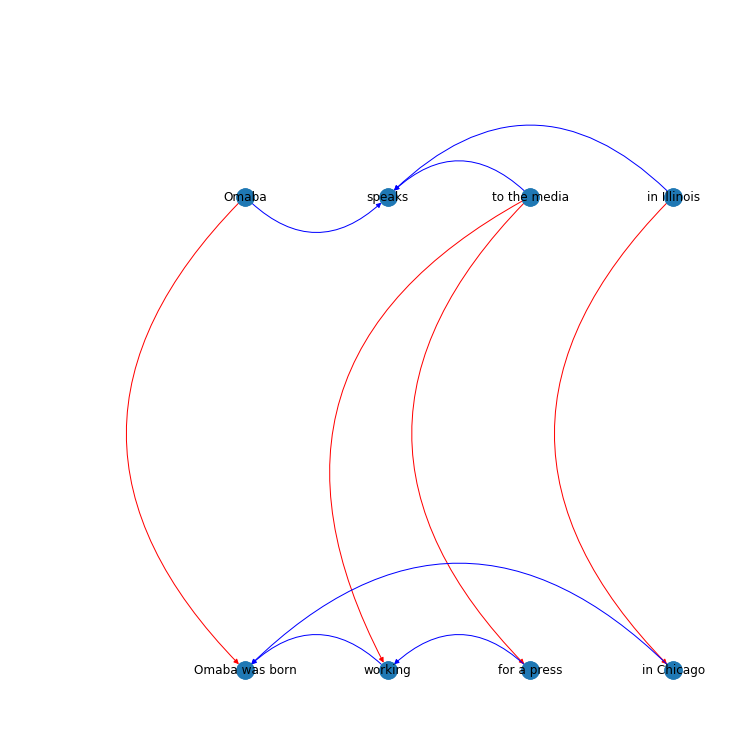

In [2]:
# Import packages for data cleaning
import numpy as np
import pandas as pd
# Import packages for data visualization
import networkx as nx
import matplotlib.pyplot as plt
graph = np.load('../data/obama/graphs_obama.npy', allow_pickle=True)
twitter = nx.DiGraph()

# add nodes into networkx
def add_nodes(i):
    nodes = []
    count = 0
    Y = []
    ind = count
    column = 0
    for node in graph[i]['nodes']:
        Y.append(node['index'][0])
    Y = sorted(Y)
    for y in Y:
        for node in graph[i]['nodes']:
            if y == node['index'][0]:
                twitter.add_node(node['word'], index=count, sentence=i, pos=node['index'][0])
                nodes.append(node['word'])
                count += 1
                break
#add index
add_nodes(0)
add_nodes(1)

'''
for node in graph[0]['nodes']:
    twitter.add_node(node['word'],index=count,sentence = 0,pos = node['index'][0])
    #twitter.add_node(node['word'])
    nodes.append(node['word'])
    count += 1
    #ind = str(column)+'.'+str(count)
count = 0
for node in graph[1]['nodes']:
    twitter.add_node(node['word'],index=count,sentence = 1,pos = node['index'][0])
    #twitter.add_node(node['word'])
    nodes.append(node['word'])
    count += 1

'''

def _process_params(G, center, dim):
    # Some boilerplate code.
    import numpy as np

    if not isinstance(G, nx.Graph):
        empty_graph = nx.Graph()
        empty_graph.add_nodes_from(G)
        G = empty_graph

    if center is None:
        center = np.zeros(dim)
    else:
        center = np.asarray(center)

    if len(center) != dim:
        msg = "length of center coordinates must match dimension of layout"
        raise ValueError(msg)

    return G, center

def rescale_layout(pos, scale=1):
    """Returns scaled position array to (-scale, scale) in all axes.

    The function acts on NumPy arrays which hold position information.
    Each position is one row of the array. The dimension of the space
    equals the number of columns. Each coordinate in one column.

    To rescale, the mean (center) is subtracted from each axis separately.
    Then all values are scaled so that the largest magnitude value
    from all axes equals `scale` (thus, the aspect ratio is preserved).
    The resulting NumPy Array is returned (order of rows unchanged).

    Parameters
    ----------
    pos : numpy array
        positions to be scaled. Each row is a position.

    scale : number (default: 1)
        The size of the resulting extent in all directions.

    Returns
    -------
    pos : numpy array
        scaled positions. Each row is a position.

    See Also
    --------
    rescale_layout_dict
    """
    # Find max length over all dimensions
    lim = 0  # max coordinate for all axes
    for i in range(pos.shape[1]):
        pos[:, i] -= pos[:, i].mean()
        lim = max(abs(pos[:, i]).max(), lim)
    # rescale to (-scale, scale) in all directions, preserves aspect
    if lim > 0:
        for i in range(pos.shape[1]):
            pos[:, i] *= scale / lim
    return pos


def multiline_layout(G, subset_key="subset", align="vertical", scale=1, center=None):
    """Position nodes in layers of straight lines.

    Parameters
    ----------
    G : NetworkX graph or list of nodes
        A position will be assigned to every node in G.

    subset_key : string (default='subset')
        Key of node data to be used as layer subset.

    align : string (default='vertical')
        The alignment of nodes. Vertical or horizontal.

    scale : number (default: 1)
        Scale factor for positions.

    center : array-like or None
        Coordinate pair around which to center the layout.

    num_sen: sentences number

    Returns
    -------
    pos : dict
        A dictionary of positions keyed by node.

    Examples
    --------
    >>> G = nx.complete_multipartite_graph(28, 16, 10)
    >>> pos = nx.multipartite_layout(G)

    Notes
    -----
    This algorithm currently only works in two dimensions and does not
    try to minimize edge crossings.

    Network does not need to be a complete multipartite graph. As long as nodes
    have subset_key data, they will be placed in the corresponding layers.

    """

    import numpy as np

    G, center = _process_params(G, center=center, dim=2)
    if len(G) == 0:
        return {}

    layers = {}
    for v, data in G.nodes(data=True):
        try:
            layer = data[subset_key]
            sent = data['sentence']
        except KeyError:
            msg = "all nodes must have subset_key (default='subset') as data"
            raise ValueError(msg)
        layers[layer] = [v] + layers.get(layer, [])

    pos = None
    nodes = []
    if align == "vertical":
        width = len(layers)
        for i, layer in layers.items():
            height = len(layer)
            xs = np.repeat(i, height)
            ys = np.arange(0, height, dtype=float)
            #ys = np.arange(0, height, dtype=float)
            offset = ((width - 1) / 2, (height - 1) / 2)
            layer_pos = np.column_stack([xs, ys]) - offset
            if pos is None:
                pos = layer_pos
            else:
                pos = np.concatenate([pos, layer_pos])
            nodes.extend(layer)
        pos = rescale_layout(pos, scale=scale) + center
        pos = dict(zip(nodes, pos))
        return pos

    if align == "horizontal":
        height = len(layers)
        for i, layer in layers.items():
            width = len(layer)
            xs = np.arange(0, width, dtype=float)
            ys = np.repeat(i, width)
            offset = ((width - 1) / 2, (height - 1) / 2)
            layer_pos = np.column_stack([xs, ys]) - offset
            if pos is None:
                pos = layer_pos
            else:
                pos = np.concatenate([pos, layer_pos])
            nodes.extend(layer)
        pos = rescale_layout(pos, scale=scale) + center
        pos = dict(zip(nodes, pos))
        return pos

    msg = "align must be either vertical or horizontal."
    raise ValueError(msg)


pos_0 = multiline_layout(twitter,subset_key='index',scale = 1)


labels0 = {}
for i in range(len(graph[0]['edges'])):
    node1_index = i
    node1_edge = graph[0]['edges'][i]
    for j in range(len(node1_edge)):
        if node1_edge[j] != '':
            node2_index = j
            twitter.add_edge(graph[0]['nodes'][i]['word'], graph[0]['nodes'][j]['word'], color='b')
            labels0[(graph[0]['nodes'][i]['word'], graph[0]['nodes'][j]['word'])] = node1_edge[j]

labels1 = {}
for i in range(len(graph[1]['edges'])):
    node1_index = i
    node1_edge = graph[1]['edges'][i]
    for j in range(len(node1_edge)):
        if node1_edge[j] != '':
            node2_index = j
            twitter.add_edge(graph[1]['nodes'][i]['word'], graph[1]['nodes'][j]['word'], color='b')
            labels1[(graph[1]['nodes'][i]['word'], graph[1]['nodes'][j]['word'])] = node1_edge[j]

word2vec_embeddings = np.load('../data/obama/interim/word2vec_embeddings_obama.npy', allow_pickle=True)
bert_embeddings = np.load('../data/obama/interim/bert_embeddings_obama.npy', allow_pickle=True)


# link nearest node in two graphs

def cosine_similarity(vec1, vec2):
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot / (norm1 * norm2)


def get_node_embeddings(graph, embeddings):
    node_features = []
    for node in graph['nodes']:
        node_features.append(embeddings[[node['index']]].mean(axis=0))
    return np.array(node_features)


# embedding0 = get_node_embeddings(graph[0], word2vec_embeddings[0])
# embedding1 = get_node_embeddings(graph[1], word2vec_embeddings[1])

embedding0 = get_node_embeddings(graph[0], bert_embeddings[0])
embedding1 = get_node_embeddings(graph[1], bert_embeddings[1])

w_match = 1
w_nonmatch = 0.5

node_match = []
word_match = []
for i1, e1 in enumerate(embedding1):
    node_sim = []
    for e0 in embedding0:
        if (np.all(e0 == 0)) | (np.all(e1 == 0)):
            node_sim.append(0)
        else:
            node_sim.append(cosine_similarity(e0, e1))
    max_sim_node = np.argmax(node_sim)
    node_match.append((max_sim_node, i1))
    # word_match.append((graph[0][max_sim_node]['word'], graph[1][i1]['word']))

for (i, j) in node_match:
    twitter.add_edge(graph[0]['nodes'][i]['word'], graph[1]['nodes'][j]['word'], color='r')


plt.figure(figsize=(10,10))
edges = twitter.edges()
colors = [twitter[u][v]['color'] for u,v in edges]

nx.draw(twitter, pos_0,connectionstyle='arc3,rad=0.5', edge_color=colors)
nx.draw_networkx_nodes(twitter, pos_0)
nx.draw_networkx_labels(twitter, pos_0)
plt.show()